In [1]:
import numpy as np 
import math
import matplotlib.pyplot as plt 
from scipy import optimize
from scipy.optimize import fsolve


from sympy import symbols
from sympy.physics.wigner import wigner_3j
import module1 as m1 # module1 contains the function to convert r_star to r\n",

import I_functions_class as Inp
from imp import reload
#reload(I_functions_class)

In [7]:

nu = 1.
k = 3.
h = 1.e-21
mu = 1.e-23 
lam = 1.
GC = 1.
M = 1.e21
c = 1.
tol = 1.e-10
r_initial = 5000.*M
r_final= -70.*M

In [8]:
EWF = Inp.ElectronWaveFunction(nu, h, k, mu, M, lam, GC, c, tol)

In [6]:
#r_initial = 5000.*M
#r_final = -70.*M
r_points, F_points, G_points = EWF.RK_4(r_initial, r_final, 240000, up = True)

r_points_in, F_points_in, G_points_in = EWF.RK_4(r_final, r_initial, 240000, up = False)

R,T,delta = EWF.get_R_and_T_coeff(r_points,F_points,G_points,r_points_in,F_points_in,G_points_in)

5e+24
(-0.8998770694838206-0.4362012140646429j)
fpoints0 is (3.1780497164141406e-11+0j)
fpoints0 normalized is (-2.859854065480644e-11-1.3862691446576423e-11j)
-7e+22
(3.131098601780101e-11-4.4297167138791116e-12j)
(-1.372440765516942e-11+2.831326310638127e-11j) (0.9999996938909248-0.0007824436444122353j) (-0.09457289086660298+0.9955179397244098j) (-0+31782086308.186413j)
0.9999499987499375 0.00010000500037503124


In [18]:
print(r_points_in[3313])
print(r_points[236685])

#print(80000.*M)
#print(240000-3313)

-1.258338576411027e+19
8.541702257442292e+18


In [19]:
def analytic_f_g_up_positive(h,mu,r_star,M,T):
    
    v= np.sqrt(h**2 -mu**2)/h
    zeta = mu**2 * M/np.sqrt(h**2 - mu**2)
    
    #T = np.sqrt(T*np.conjugate(T))
    print(T)
    f = T*np.sqrt(1/v)*np.sqrt(h+mu)*np.exp(np.complex(0,1)*zeta*np.log(r_star/2/M))*np.exp(np.complex(0,1)*np.sqrt(h**2 -mu**2)*r_star)
    g=T*np.complex(0,-1)*np.sqrt(1/v)*np.sqrt(h-mu)*np.exp(np.complex(0,1)*zeta*np.log(r_star/2/M))*np.exp(np.complex(0,1)*np.sqrt(h**2 -mu**2)*r_star)
    
    return f,g

In [20]:
f,g = analytic_f_g_up_positive(h,mu,r_points[:236685],M,T)
print(f[0],g[0]) 

(-0.7212339480071666-0.6926903750471236j)
(-1.9767625892666345e-11+2.4885534299027793e-11j) (2.4637910882380566e-11+1.9570928204614795e-11j)


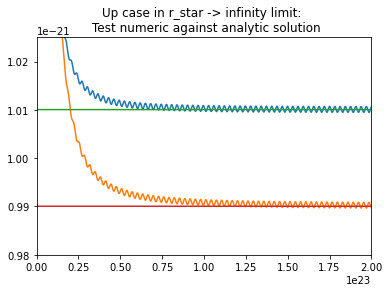

In [21]:
plt.xlim(6e2,.2e24)
plt.ylim(.98e-21, 1.025e-21)
plt.plot(r_points, np.abs(F_points)**2)
plt.plot(r_points, np.abs(G_points)**2)
plt.plot(r_points[:236685],np.abs((f*np.conjugate(f))))
plt.plot(r_points[:236685],np.abs(g*np.conjugate(g)))
plt.title("Up case in r_star -> infinity limit: \n Test numeric against analytic solution")
plt.show()

#looks good! 

In [22]:
import cmath
def analytic_f_g_up_negative(h,mu,r_star,M,R,T):
    v= np.sqrt(h**2 -mu**2)/h
    zeta = mu**2 * M/np.sqrt(h**2 - mu**2)
    
    f = np.sqrt(h)*np.exp(np.complex(0,1)*h*r_star) -np.conjugate(R)*np.exp(2*np.complex(0,1)*cmath.phase(T))*np.sqrt(h)*np.exp(np.complex(0,-1)*h*r_star)
    g = np.complex(0,-1)*np.sqrt(h)*np.exp(np.complex(0,1)*h*r_star) -np.conjugate(R)*np.exp(2*np.complex(0,1)*cmath.phase(T))*np.complex(0,1)*np.sqrt(h)*np.exp(np.complex(0,-1)*h*r_star)
    
    return f,g
    

In [23]:
fneg,gneg = analytic_f_g_up_negative(h,mu,r_points[236686:],M,R,T)
print(fneg[0],gneg[0]) 

(3.1589732215196127e-11-4.2952307929547054e-13j) (-3.662991121652681e-13-3.1650813853284177e-11j)


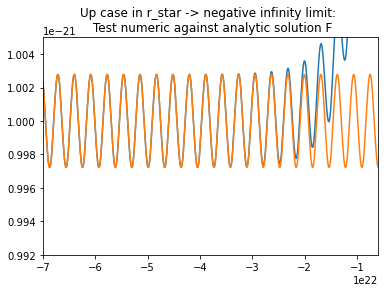

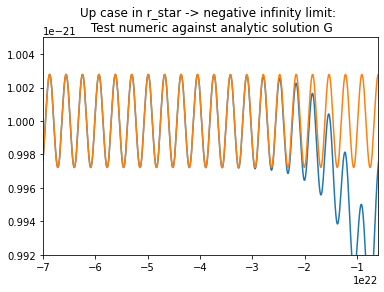

In [24]:
plt.xlim(-7.e22,-6.e21)
plt.ylim(.992e-21, 1.005e-21)
plt.plot(r_points, np.abs(F_points)**2)
plt.plot(r_points[236686:],np.abs((fneg*np.conjugate(fneg))))
plt.title("Up case in r_star -> negative infinity limit: \n Test numeric against analytic solution F")
plt.show()

plt.xlim(-7.e22,-6.e21)
plt.ylim(.992e-21, 1.005e-21)
plt.plot(r_points, np.abs(G_points)**2)
plt.plot(r_points[236686:],np.abs(gneg*np.conjugate(gneg)))
plt.title("Up case in r_star -> negative infinity limit: \n Test numeric against analytic solution G")
plt.show()

#looks good! 

In [25]:
def analytic_f_g_in_negative(h,mu,r_star,M,R,T):
    #v= np.sqrt(h**2 -mu**2)/h
    #zeta = mu**2 * M/np.sqrt(h**2 - mu**2)
    
    f = T*np.sqrt(h)*np.exp(np.complex(0,-1)*h*r_star)
    g = T*np.complex(0,1)*np.sqrt(h)*np.exp(np.complex(0,-1)*h*r_star)
    print(T)
    return f,g


def analytic_f_g_in_positive(h,mu,r_star,M,R,T):
    v= np.sqrt(h**2 -mu**2)/h
    zeta = mu**2 * M/np.sqrt(h**2 - mu**2)
    
    f = np.sqrt(1/v)*np.sqrt(h+mu)*np.exp(np.complex(0,-1)*zeta*np.log(r_star/2/M))*np.exp(np.complex(0,-1)*np.sqrt(h**2 -mu**2)*r_star)+ np.sqrt(1/v)*R*np.sqrt(h+mu)*np.exp(np.complex(0,1)*zeta*np.log(r_star/2/M))*np.exp(np.complex(0,1)*np.sqrt(h**2 -mu**2)*r_star)

    g = np.sqrt(1/v)*np.complex(0,1)*np.sqrt(h-mu)*np.exp(np.complex(0,-1)*zeta*np.log(r_star/2/M))*np.exp(np.complex(0,-1)*np.sqrt(h**2 -mu**2)*r_star)+ np.sqrt(1/v)*R*np.complex(0,-1)*np.sqrt(h-mu)*np.exp(np.complex(0,1)*zeta*np.log(r_star/2/M))*np.exp(np.complex(0,1)*np.sqrt(h**2 -mu**2)*r_star)
    
    return f,g

In [26]:
finneg,ginneg = analytic_f_g_in_negative(h,mu,r_points_in[0:3313],M,R,T)
fin,gin = analytic_f_g_in_positive(h,mu,r_points_in[3314:],M,R,T)

(-0.7212339480071666-0.6926903750471236j)


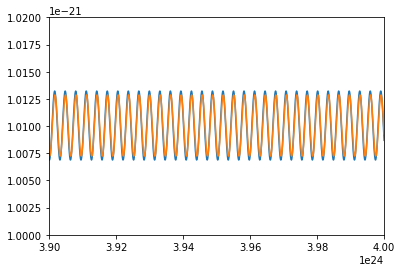

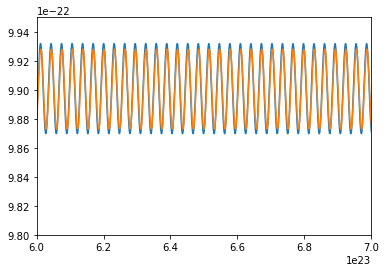

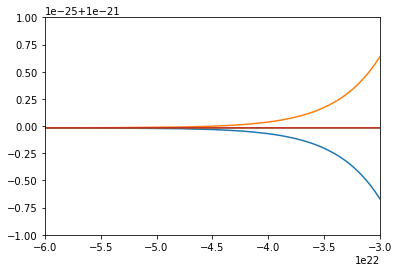

In [27]:
plt.xlim(3.9e24,4.e24)
plt.ylim(.00100e-18, .00102e-18)
#plt.plot(r_points_in, np.abs(G_points_in)**2)
plt.plot(r_points_in, np.abs(F_points_in)**2)#
plt.plot(r_points_in[3314:],np.abs(fin)**2)
#plt.plot(r_points_in[3320:],np.abs(gin)**2)
plt.show()


plt.xlim(6e23,7.e23)
#plt.ylim(.000098975e-17, .00009904e-17)
plt.ylim(.0009800e-18, .000995e-18)
plt.plot(r_points_in, np.abs(G_points_in)**2)
#plt.plot(r_points_in, np.abs(F_points_in)**2)
#plt.plot(r_points_in[3320:],np.abs(fin)**2)
plt.plot(r_points_in[3314:],np.abs(gin)**2)
plt.show()


plt.xlim(-6e22,-3.e22)
#plt.ylim(.0, .0001)
plt.ylim(.00009999e-17, .00010001e-17)
plt.plot(r_points_in, np.abs(G_points_in)**2)
plt.plot(r_points_in, np.abs(F_points_in)**2)
plt.plot(r_points_in[0:3313],np.abs(finneg)**2)
plt.plot(r_points_in[0:3313],np.abs(ginneg)**2)
plt.show()

In [28]:
# test with different k

In [29]:
nu = 1.
k2 = 4.
h2 = 1.e-21
mu2 = 1.e-23 
lam = 1.
GC = 1.
M = 1.e21
c = 1.
tol = 1.e-10

EWF2 = Inp.ElectronWaveFunction(nu, h2, k2, mu2, M, lam, GC, c, tol)

r_points2, F_points2, G_points2 = EWF2.RK_4(r_initial, r_final, 240000, up = True)

r_points_in2, F_points_in2, G_points_in2 = EWF2.RK_4(r_final, r_initial, 240000, up = False)

R2,T2 = EWF2.get_R_and_T_coeff(r_points2,F_points2,G_points2,r_points_in2,F_points_in2,G_points_in2)

5e+24
(0.9881863860718492+0.15115748989875571j)
fpoints0 is (3.1780497164141406e-11+0j)
fpoints0 normalized is (3.140505464019955e-11+4.803860179066139e-12j)
-7e+22
(-2.859935615792591e-11+1.3468028008105406e-11j)
(4.755940480246438e-12-3.109178141748323e-11j) (0.9999996938909248-0.0007824436444122352j) (-0.09457289086660298+0.9955179397244098j) (-0+31782086308.186413j)
0.9999499987499375 0.00010000500037503124


In [30]:
f2,g2 = analytic_f_g_up_positive(h2,mu2,r_points2[:236600],M,T2)
fneg2,gneg2 = analytic_f_g_up_negative(h2,mu2,r_points2[236700:],M,R2,T2)

(-0.2431709325574798+0.9696282012369882j)


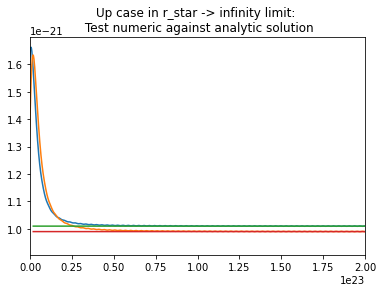

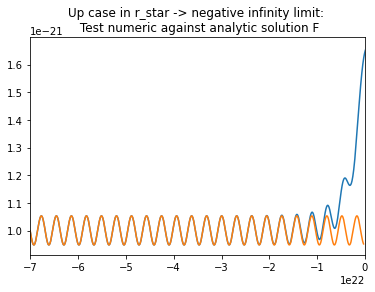

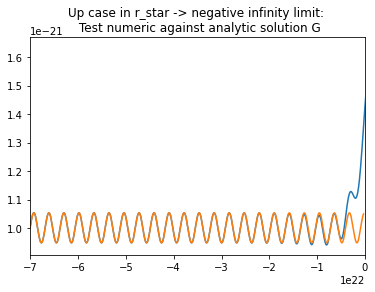

In [31]:
plt.xlim(6e2,.2e24)
#plt.ylim(.9e-21, 1.1e-21)
plt.plot(r_points2, np.abs(F_points2)**2)
plt.plot(r_points2, np.abs(G_points2)**2)
plt.plot(r_points2[:236600],np.abs((f2*np.conjugate(f2))))
plt.plot(r_points2[:236600],np.abs(g2*np.conjugate(g2)))
plt.title("Up case in r_star -> infinity limit: \n Test numeric against analytic solution")
plt.show()

plt.xlim(-7.e22,-6.e2)
#plt.ylim(.9e-21, 1.1e-21)
plt.plot(r_points2, np.abs(F_points2)**2)
plt.plot(r_points2[236700:],np.abs((fneg2*np.conjugate(fneg2))))
plt.title("Up case in r_star -> negative infinity limit: \n Test numeric against analytic solution F")
plt.show()

plt.xlim(-7.e22,-6.e2)
#plt.ylim(.9e-21, 1.1e-21)
plt.plot(r_points2, np.abs(G_points2)**2)
plt.plot(r_points2[236700:],np.abs(gneg2*np.conjugate(gneg2)))
plt.title("Up case in r_star -> negative infinity limit: \n Test numeric against analytic solution G")
plt.show()

In [32]:
finneg2,ginneg2 = analytic_f_g_in_negative(h2,mu2,r_points_in2[0:3310],M,R2,T2)
fin2,gin2 = analytic_f_g_in_positive(h2,mu2,r_points_in2[3320:],M,R2,T2)

(-0.2431709325574798+0.9696282012369882j)


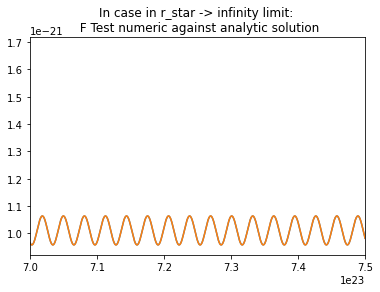

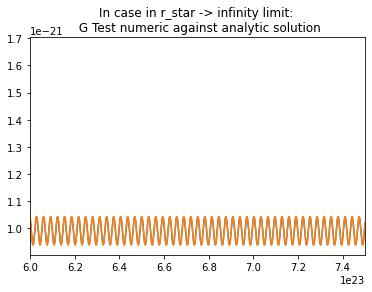

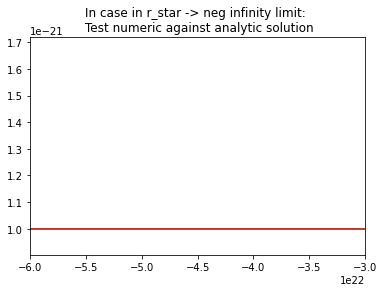

In [33]:
plt.xlim(7e23,7.5e23)
#plt.ylim(.000095e-17, .00011e-17)
#plt.plot(r_points_in, np.abs(G_points_in)**2)
plt.plot(r_points_in2, np.abs(F_points_in2)**2)
plt.plot(r_points_in2[3320:],np.abs(fin2)**2)
#plt.plot(r_points_in[3320:],np.abs(gin)**2)
plt.title("In case in r_star -> infinity limit: \n F Test numeric against analytic solution")

plt.show()


plt.xlim(6e23,7.5e23)
#plt.ylim(.000095e-17, .00011e-17)
plt.plot(r_points_in2, np.abs(G_points_in2)**2)
#plt.plot(r_points_in, np.abs(F_points_in)**2)
#plt.plot(r_points_in[3320:],np.abs(fin)**2)
plt.plot(r_points_in2[3320:],np.abs(gin2)**2)
plt.title("In case in r_star -> infinity limit: \n G Test numeric against analytic solution")

plt.show()


plt.xlim(-6e22,-3.e22)
#plt.ylim(.0, .0001)
#plt.ylim(.0000999e-17, .0001009e-17)
plt.plot(r_points_in2, np.abs(G_points_in2)**2)
plt.plot(r_points_in2, np.abs(F_points_in2)**2)
plt.plot(r_points_in2[0:3310],np.abs(finneg2)**2)
plt.plot(r_points_in2[0:3310],np.abs(ginneg2)**2)
plt.title("In case in r_star -> neg infinity limit: \n Test numeric against analytic solution")

plt.show()

In [16]:
#bound check for negative k 

In [2]:
nu = 1.
k = -2.
h =3.8e-23  #h and h_prime should be on the same order but smaller than mu
h_prime = 3.9e-23
omega = 4.e-25  #should be much much less than 1/r but lowest one is only ~ 1/r i think -> want to ask about this 
mu = 4.1796514508e-23
lam = 1.
GC = 1.
M = 1.e21
c = 1.
tol = 1.e-10
r_initial = 5000.*M
r_final= -70.*M

In [3]:
EWF = Inp.ElectronWaveFunction(nu, h, k, mu, M, lam, GC, c, tol)

/users/PCON0003/koivuemily/PrimordialBlackHole/I_functions_class.py:100: RuntimeWarning: invalid value encountered in sqrt
  self.v = np.sqrt(h**2 -mu**2)/h


In [4]:
r_points, F_points, G_points = EWF.RK_4(r_initial, r_final, 240000, up = True)

r_points_in, F_points_in, G_points_in = EWF.RK_4(r_final, r_initial, 240000, up = False)

R,T,delta = EWF.get_R_and_T_coeff(r_points,F_points,G_points,r_points_in,F_points_in,G_points_in)

5e+24
(4.584578665109371+0j)
(-2.894752205896854e-54-9.584746474593075e-54j)
(-1.3271219203933007e-53-4.3942024197901665e-53j)
-7e+22
0j
(1.2774905011100859-4.873700647212873e-17j)


In [5]:
def bound_up_rstar_neg(h,delta,r_star):
    F_up = np.sqrt(h)*np.exp(complex(0,1)*h*r_star)+np.exp(2*complex(0,1)*delta)*np.sqrt(h)*np.exp(complex(0,-1)*h*r_star)
    G_up = complex(0,-1)*np.sqrt(h)*np.exp(complex(0,1)*h*r_star) + np.exp(2*complex(0,1)*delta)*np.sqrt(h)*complex(0,1)*np.exp(complex(0,-1)*h*r_star)
    
    return F_up, G_up

In [6]:
checkF, checkG = bound_up_rstar_neg(h,delta,r_points[30310:])

In [7]:
r_points[-1]/M

-70.0

In [8]:
import module1 as m1 

In [9]:
m1.r_star_to_r(-2*M, M, 1.e-10)/M

2.2400564779752825

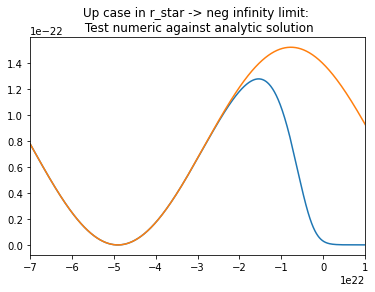

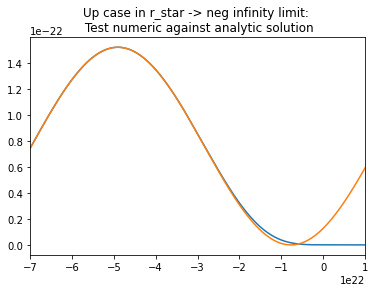

In [10]:

plt.xlim(-7e22,1.e22)
#plt.ylim(.0, .0001)
#plt.ylim(.0000999e-17, .0001009e-17)
plt.plot(r_points, np.abs(G_points)**2)
#plt.plot(r_points, np.abs(F_points)**2)
plt.plot(r_points[30310:],np.abs(checkG)**2)
#plt.plot(r_points[0:30310],np.abs(checkF)**2)
plt.title("Up case in r_star -> neg infinity limit: \n Test numeric against analytic solution")

plt.show()


plt.xlim(-7e22,1.e22)
#plt.ylim(.0, .0001)
#plt.ylim(.0000999e-17, .0001009e-17)
#plt.plot(r_points, np.abs(G_points)**2)
plt.plot(r_points, np.abs(F_points)**2)
#plt.plot(r_points[30310:],np.abs(checkG)**2)
plt.plot(r_points[30310:],np.abs(checkF)**2)
plt.title("Up case in r_star -> neg infinity limit: \n Test numeric against analytic solution")

plt.show()

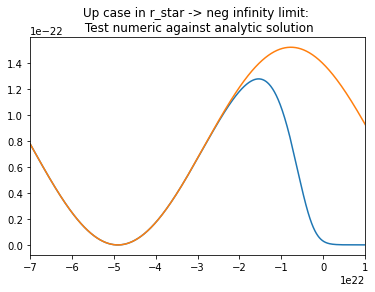

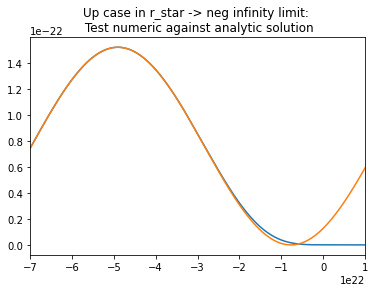

In [11]:
plt.xlim(-7e22,1.e22)
#plt.ylim(.0, .0001)
#plt.ylim(.0000999e-17, .0001009e-17)
plt.plot(r_points, np.abs(G_points)**2)
#plt.plot(r_points, np.abs(F_points)**2)
plt.plot(r_points[30310:],np.abs(checkG)**2)
#plt.plot(r_points[0:30310],np.abs(checkF)**2)
plt.title("Up case in r_star -> neg infinity limit: \n Test numeric against analytic solution")

plt.show()


plt.xlim(-7e22,1.e22)
#plt.ylim(.0, .0001)
#plt.ylim(.0000999e-17, .0001009e-17)
#plt.plot(r_points, np.abs(G_points)**2)
plt.plot(r_points, np.abs(F_points)**2)
#plt.plot(r_points[30310:],np.abs(checkG)**2)
plt.plot(r_points[30310:],np.abs(checkF)**2)
plt.title("Up case in r_star -> neg infinity limit: \n Test numeric against analytic solution")

plt.show()

In [12]:
nu = 1.
k = 2.
h =-3.8e-23  
h_prime = 3.9e-23
omega = 4.e-25  #should be much much less than 1/r but lowest one is only ~ 1/r i think -> want to ask about this 
mu = 4.1796514508e-23
lam = 1.
GC = 1.
M = 1.e21
c = 1.
tol = 1.e-10
r_initial = 5000.*M
r_final= -70.*M

In [13]:
EWF = Inp.ElectronWaveFunction(nu, h, k, mu, M, lam, GC, c, tol)


/users/PCON0003/koivuemily/PrimordialBlackHole/I_functions_class.py:100: RuntimeWarning: invalid value encountered in sqrt
  self.v = np.sqrt(h**2 -mu**2)/h


In [14]:
r_points, F_points, G_points = EWF.RK_4(r_initial, r_final, 240000, up = True)

r_points_in, F_points_in, G_points_in = EWF.RK_4(r_final, r_initial, 240000, up = False)

R,T,delta = EWF.get_R_and_T_coeff(r_points,F_points,G_points,r_points_in,F_points_in,G_points_in)

5e+24
(0.21812255237551778+0j)
(nan+nanj)
(nan+nanj)
-7e+22


/users/PCON0003/koivuemily/PrimordialBlackHole/I_functions_class.py:219: RuntimeWarning: invalid value encountered in sqrt
  A = 2*np.complex(0,-1)*np.sqrt(self.h)*np.exp(np.complex(0,1)*self.h*r_points[-1])/(np.complex(0,-1)*F_points[-1]+G_points[-1])


0j
(nan+nanj)


/users/PCON0003/koivuemily/PrimordialBlackHole/I_functions_class.py:238: RuntimeWarning: invalid value encountered in sqrt
  delta = np.complex(0,-1)*.5*np.log((np.complex(0,1)*F_points_up[-1]+G_points_up[-1])/(2*np.complex(0,1)*np.sqrt(self.h)*np.exp(np.complex(0,-1)*self.h*r_up[-1])))
/users/PCON0003/koivuemily/PrimordialBlackHole/I_functions_class.py:238: RuntimeWarning: invalid value encountered in cdouble_scalars
  delta = np.complex(0,-1)*.5*np.log((np.complex(0,1)*F_points_up[-1]+G_points_up[-1])/(2*np.complex(0,1)*np.sqrt(self.h)*np.exp(np.complex(0,-1)*self.h*r_up[-1])))


In [15]:
checkF, checkG = bound_up_rstar_neg(h,delta,r_points[30310:])

/tmp/slurmtmp.15179763/ipykernel_259974/4257954443.py:2: RuntimeWarning: invalid value encountered in sqrt
  F_up = np.sqrt(h)*np.exp(complex(0,1)*h*r_star)+np.exp(2*complex(0,1)*delta)*np.sqrt(h)*np.exp(complex(0,-1)*h*r_star)
/tmp/slurmtmp.15179763/ipykernel_259974/4257954443.py:3: RuntimeWarning: invalid value encountered in sqrt
  G_up = complex(0,-1)*np.sqrt(h)*np.exp(complex(0,1)*h*r_star) + np.exp(2*complex(0,1)*delta)*np.sqrt(h)*complex(0,1)*np.exp(complex(0,-1)*h*r_star)


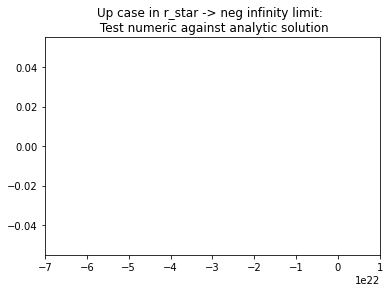

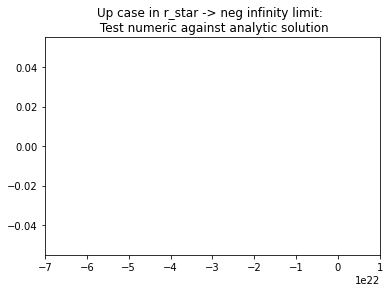

In [16]:
plt.xlim(-7e22,1.e22)
#plt.ylim(.0, .0001)
#plt.ylim(.0000999e-17, .0001009e-17)
plt.plot(r_points, np.abs(G_points)**2)
#plt.plot(r_points, np.abs(F_points)**2)
plt.plot(r_points[30310:],np.abs(checkG)**2)
#plt.plot(r_points[0:30310],np.abs(checkF)**2)
plt.title("Up case in r_star -> neg infinity limit: \n Test numeric against analytic solution")

plt.show()


plt.xlim(-7e22,1.e22)
#plt.ylim(.0, .0001)
#plt.ylim(.0000999e-17, .0001009e-17)
#plt.plot(r_points, np.abs(G_points)**2)
plt.plot(r_points, np.abs(F_points)**2)
#plt.plot(r_points[30310:],np.abs(checkG)**2)
plt.plot(r_points[30310:],np.abs(checkF)**2)
plt.title("Up case in r_star -> neg infinity limit: \n Test numeric against analytic solution")

plt.show()

In [34]:
omega = 1.e-21
l = 3
tol = 1.e-10

In [89]:
PWF = Inp.PhotonWaveFunction(M, omega, l, tol)

In [90]:
#phot_try0= PhotonWaveFunction(M,omega,l,tol)
r_gamma, F_points_gamma, z_points_gamma, f_points_gamma_prime = PWF.RK_4(r_initial, r_final, 240000, up = True)
r_gamma_in, F_points_gamma_in, z_points_gamma_in, f_points_gamma_prime_in = PWF.RK_4(r_final, r_initial, 240000, up = False)
        

fpoints0 is (1+0j)
normalized using rup neg infinity:-7e+22
(-0.06493334147194163+0.9978775016988811j)
fpoints0 renormalized is (-0.06493334147194163+0.9978775016988811j)
fpoints0 is (1+0j)
is this rstar infinity: 5e+24
(-0.7005263627372889-0.713609600791327j)
fpoints0 renormalized is (-0.7005263627372889-0.713609600791327j)


In [37]:
Rgamma, Tgamma = PWF.get_R_and_T_coeff(r_gamma,F_points_gamma,z_points_gamma,r_gamma_in,F_points_gamma_in,z_points_gamma_in)
print(Rgamma,Tgamma)
print(Rgamma*np.conjugate(Rgamma) + Tgamma*np.conjugate(Tgamma)) 

rin negative infinity-7e+22
compare T:(0.9999758472315122, 0.9999758472314927)
rstar up used 5e+24
t phase is 3.0512806860062605
rstar used :-7e+22
(-0.0026663754407402064-0.004163967656762363j) (-0.9959126181123873+0.09018816062013049j)
(1.0000002954161498+0j)


In [38]:
Rgamma*np.conjugate(Rgamma)


(2.444818463754558e-05+0j)

In [39]:
def analytic_f_gamma_in_negative(omega,rstar,T):
    
    return T*np.exp(np.complex(0,-1)*omega*rstar)

def analytic_f_gamma_in_positive(omega,rstar,R):
    
    return np.exp(np.complex(0,-1)*omega*rstar)+ R*np.exp(np.complex(0,1)*omega*rstar)

def analytic_f_gamma_up_negative(omega,rstar,R,T):
    
    return np.exp(np.complex(0,1)*omega*rstar) - np.conjugate(R)*np.exp(2*np.complex(0,1)*cmath.phase(T))*np.exp(np.complex(0,-1)*omega*rstar)

def analytic_f_gamma_up_positive(omega,rstar,T):
    
    return T*np.exp(np.complex(0,1)*omega*rstar)

In [40]:
fgammainneg = analytic_f_gamma_in_negative(omega,r_gamma_in[:3313],Tgamma)
fgammain = analytic_f_gamma_in_positive(omega,r_gamma_in[3314:],Rgamma)

fgammaupneg = analytic_f_gamma_up_negative(omega,r_gamma[236686:],Rgamma,Tgamma)
fgammaup = analytic_f_gamma_up_positive(omega,r_gamma[:236685],Tgamma)


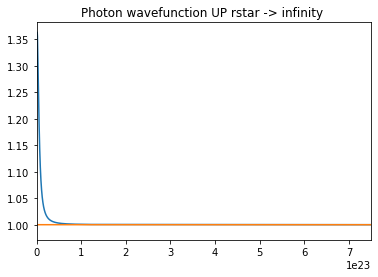

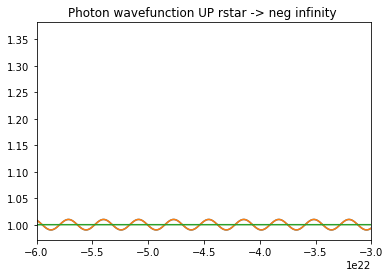

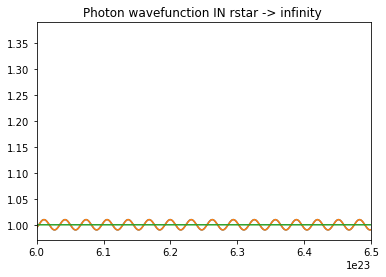

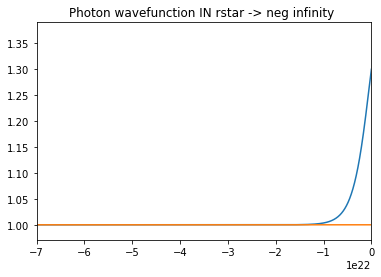

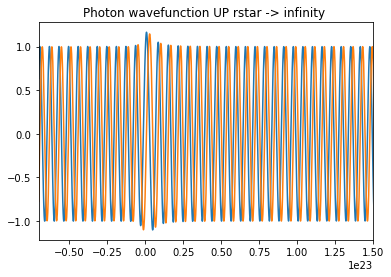

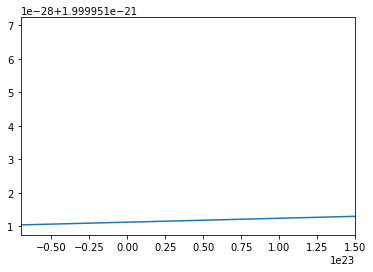

In [41]:
plt.plot(r_gamma,np.abs(np.array(F_points_gamma))**2)
plt.xlim(2e2,7.5e23)
#plt.ylim(.9999,1.0001)
plt.plot(r_gamma[:236685],np.abs(fgammaup)**2)
plt.title("Photon wavefunction UP rstar -> infinity ")
plt.show()

plt.plot(r_gamma,np.abs(np.array(F_points_gamma)**2))
plt.xlim(-6e22,-3.e22)
#plt.ylim(.99,1.01)
plt.plot(r_gamma[236686:],np.abs(fgammaupneg)**2)
plt.plot(r_gamma,np.ones((len(r_gamma))))
plt.title("Photon wavefunction UP rstar -> neg infinity ")
plt.show()

plt.plot(r_gamma_in,np.abs(F_points_gamma_in)**2) #gives something like 40,000 instead of 1 like the others
plt.plot(r_gamma_in[3314:],np.abs(fgammain)**2)
plt.plot(r_gamma,np.ones((len(r_gamma))))
#plt.ylim(.99,1.01)
plt.xlim(6e23,6.5e23)
plt.title("Photon wavefunction IN rstar -> infinity ")
plt.show()

plt.plot(r_gamma_in,np.abs(F_points_gamma_in)**2)
plt.plot(r_gamma_in[:3313],np.abs(fgammainneg)**2)
plt.xlim(-7e22,-4.e2)
#plt.ylim(.999999,1.000001)
plt.title("Photon wavefunction IN rstar -> neg infinity ")
plt.show()


plt.plot(r_gamma,np.real(np.array(F_points_gamma)))
plt.plot(r_gamma,np.imag(np.array(F_points_gamma)))
plt.xlim(-7e22,1.5e23)
#plt.ylim(.9999,1.0001)
#plt.plot(r_gamma[:236685],np.abs(fgammaup)**2)
plt.title("Photon wavefunction UP rstar -> infinity ")
plt.show()

plt.plot(r_gamma,np.imag((np.array(F_points_gamma_in)*np.conjugate(z_points_gamma_in)-np.conjugate(F_points_gamma_in)*(z_points_gamma_in))))
plt.xlim(-7e22,1.5e23)
plt.show()

In [42]:
r_gamma_in[3314:]

array([8.54170226e+18, 2.96667903e+19, 5.07918783e+19, ...,
       4.99995775e+24, 4.99997887e+24, 5.00000000e+24])

In [43]:
print(np.abs(F_points_gamma_in[-1])**2,np.abs(fgammain[-1])**2)

#why is the in so different 
print(r_gamma_in[-1]*omega)
print(np.exp(np.complex(0,-1)*r_gamma_in[-1]*omega))
print(np.abs(np.exp(np.complex(0,-1)*r_gamma_in[-1]*omega))**2)
print()
print(R*np.exp(np.complex(0,1)*omega*r_gamma_in[-1]))
print(np.abs(R*np.exp(np.complex(0,1)*omega*r_gamma_in[-1]))**2)

print(np.abs(np.exp(np.complex(0,-1)*r_gamma_in[-1]*omega))**2 + np.abs(R*np.exp(np.complex(0,1)*omega*r_gamma_in[-1]))**2)

1.0025569187024832 1.0025569187024832
5000.0
(0.15466840618074712+0.9879664387667768j)
0.9999999999999998

(0.001085062503029371-0.0008687338472280956j)
1.9320591328000913e-06
1.0000019320591327


In [44]:
print(cmath.phase(Tgamma))

3.0512806860062605


In [45]:
#renorm of in 
a = 2*np.complex(0,-1)*omega*np.exp(np.complex(0,-1)*omega*r_gamma_in[-1])/(F_points_gamma_in[-1]*np.complex(0,-1)*omega - f_points_gamma_prime_in[-1])

In [46]:
print(2*np.complex(0,-1)*omega)
print(np.exp(np.complex(0,-1)*omega*r_gamma_in[-1]))
print(F_points_gamma_in[-1])
print((F_points_gamma_in[-1]*np.complex(0,-1)*omega))# - f_points_gamma_prime_in[-1]))
print(f_points_gamma_prime_in[-1])
print(a)

-2e-21j
(0.15466840618074712+0.9879664387667768j)
(0.15014214184405672+0.9899566939745206j)
(9.899566939745205e-22-1.5014214184405672e-22j)
(9.859761835590332e-22-1.5919467051743737e-22j)
(51.79260864131089-195.5002765796969j)


In [47]:
print(2*np.complex(0,1)*cmath.phase(Tgamma))
print(np.exp(2*np.complex(0,1)*cmath.phase(T)))
print(np.exp(np.complex(0,1)*omega*r_gamma_in[-1]))
print(np.exp(np.complex(0,-1)*omega*r_gamma_in[-1]))
print(Rgamma)
print(Tgamma)

6.102561372012521j
(0.04035851812417803+0.9991852631093097j)
(0.15466840618074712-0.9879664387667768j)
(0.15466840618074712+0.9879664387667768j)
(-0.0026663754407402064-0.004163967656762363j)
(-0.9959126181123873+0.09018816062013049j)


In [48]:
print(r_gamma_in[0]*omega*np.complex(0,1)*F_points_gamma_in[0])

(-49.95267205539289+49.03684539161022j)


In [49]:
F_points_gamma*omega

array([-6.49333415e-23+9.97877502e-22j, -4.38401710e-23+9.99026470e-22j,
       -2.27274367e-23+9.99729619e-22j, ...,
        6.70104175e-22-7.48095141e-22j,  6.54221752e-22-7.61886187e-22j,
        6.38047380e-22-7.75337238e-22j])

In [50]:
F_gamma_mod_squared = F_points_gamma*np.conjugate(F_points_gamma)

In [66]:
from astropy.io import fits

In [94]:
col1gammar = fits.Column(name='rpoints_up',format='D',array=r_gamma)
col2gammaF = fits.Column(name='F_points_up',format='M',array=F_points_gamma)
col2gammaz = fits.Column(name='z_points_up',format='M',array=z_points_gamma)

#r_gamma_in, F_points_gamma_in, z_points_gamma_in, f_points_gamma_prime_in = PWF.RK_4(r_final, r_initial, 240000, up = False)
col1gammarin = fits.Column(name='rpointsin',format='D',array=r_gamma_in)
col2gammaFin = fits.Column(name='F_points_in',format='M',array=F_points_gamma_in)
col2gammazin = fits.Column(name='z_points_in',format='M',array=z_points_gamma_in)


In [110]:
cols = fits.ColDefs([col1gammar, col2gammaF,col2gammaz,col1gammarin, col2gammaFin,col2gammazin])
table_hdu = fits.BinTableHDU.from_columns(cols)
table_hdu.header['omega']=omega
table_hdu.header['R']=R
table_hdu.header['T']=T

In [111]:
hdu = fits.Header()
hdu['type']='Photon Wavefunction'
#hdu.header['up']='True'
hdu['r_init']=r_initial
hdu['r_final']=r_final
hdu['M']= M
#hdu.header['omega']=omega
hdu['l']=l
empty_primary = fits.PrimaryHDU(header=hdu)


In [112]:
hdul = fits.HDUList([empty_primary,table_hdu])

In [113]:
hdul.writeto('withprimarytest2.fits')

ColDefs(
    name = 'rpoints'; format = 'D'
    name = 'F_points'; format = 'M'
    name = 'z_points'; format = 'M'
)

In [75]:
cols['rpoints']

TypeError: 'Column' object is not subscriptable

In [114]:
hdul[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   80 / length of dimension 1                          
NAXIS2  =               240000 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    6 / number of table fields                         
TTYPE1  = 'rpoints_up'                                                          
TFORM1  = 'D       '                                                            
TTYPE2  = 'F_points_up'                                                         
TFORM2  = 'M       '                                                            
TTYPE3  = 'z_points_up'     